<a href="https://colab.research.google.com/github/vijaivimu/Python-For-Data-Science/blob/main/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch

In [6]:
scalar = torch.tensor(20)

In [7]:
scalar.ndim

0

In [8]:
scalar.shape

torch.Size([])

In [9]:
scalar.item()

20

In [10]:
list = [1,2,3,4,5]

In [11]:
vector = torch.tensor(list)

In [12]:
vector

tensor([1, 2, 3, 4, 5])

In [13]:
vector.shape

torch.Size([5])

In [14]:
vector.ndim

1

In [15]:
vector[0].item()

1

In [16]:
vector + 10

tensor([11, 12, 13, 14, 15])

In [17]:
matrix = torch.tensor([[1,2,3],[4,5,6]])

In [18]:
matrix.shape

torch.Size([2, 3])

In [19]:
matrix.ndim

2

In [20]:
tensor3d = torch.tensor([[[1,2,3],[4,5,6]],[[17,2,3],[18,5,6]]                                        ])

In [21]:
tensor3d.shape

torch.Size([2, 2, 3])

In [22]:
k= torch.rand((3,3,2))

In [23]:
k.shape

torch.Size([3, 3, 2])

In [24]:
k.ndim

3

In [25]:
k.size()

torch.Size([3, 3, 2])

In [26]:
tensordtyp = torch.tensor([1.0,2.0,3.0],dtype=torch.int16)

In [27]:
tensordtyp

tensor([1, 2, 3], dtype=torch.int16)

In [28]:
tensordtyp = torch.tensor([1.0,2.0,3.0],requires_grad=True)

In [29]:
tensordtyp = torch.tensor([1.0,2.0,3.0],requires_grad=True,device='cuda:0')

In [30]:
tensor1 = torch.rand((2,2))

In [31]:
tensor1 = tensor1.cuda()

In [32]:
tensor2 = torch.rand((2,2))


In [33]:
tensor1 + tensor2

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [34]:
tensor2 = tensor2.cuda()

In [35]:
tensor1 + tensor2

tensor([[0.7763, 1.2231],
        [0.6391, 1.3296]], device='cuda:0')

In [36]:
tensor1.cpu() + tensor2.cpu()

tensor([[0.7763, 1.2231],
        [0.6391, 1.3296]])

In [ ]:
torch.matmul(tensor2, tensor1)

In [ ]:
tensor5 = torch.rand((2,2))

In [ ]:
tensor5 = tensor5.to(torch.int64)

In [ ]:
torch.matmul(tensor2, tensor5.cuda())

In [ ]:
print(tensor5.dtype)

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
x= torch.linspace(1,10,100).reshape(-1,1)

In [40]:
y= 2* x + 1 + torch.rand(x.size())

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x.numpy(),y.numpy(),test_size=0.2,random_state=25)

In [44]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-44-c90240005b54>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)
<ipython-input-44-c90240005b54>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float32)
<ipython-input-44-c90240005b54>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-44-c90240005b54>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourc

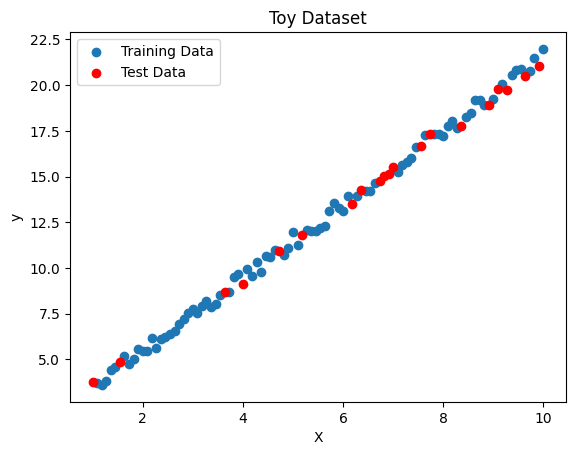

In [45]:
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data')
plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data', color='red')
plt.title('Toy Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [46]:
import torch.nn as nn
class LRModel(nn.Module):  # A robot that knows how to learn a straight-line rule
    def __init__(self, input_dim, output_dim):
        super(LRModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # Creates the "straight-line rule"

    def forward(self, x):  # What the robot does when we give it some X
        out = self.linear(x)
        return out

input_dim = 1  # X has one column
output_dim = 1  # Y has one column
lr_model = LRModel(input_dim, output_dim)  # Our robot model

In [48]:
# Make predictions with the untrained model
with torch.no_grad():
    untrained_predictions = lr_model(x_test)

In [49]:
untrained_predictions

tensor([[ 0.4520],
        [ 0.2557],
        [ 0.3211],
        [ 0.8445],
        [ 0.9917],
        [-0.1205],
        [ 0.7136],
        [ 1.2370],
        [ 1.2043],
        [ 1.3842],
        [-0.2186],
        [ 0.8281],
        [ 1.1062],
        [ 0.9590],
        [ 0.8608],
        [ 1.2697],
        [ 1.3351],
        [ 0.8118],
        [ 0.7463],
        [ 0.5337]])

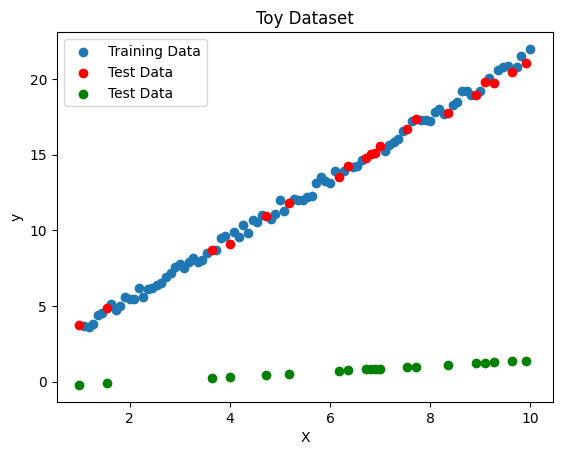

In [50]:
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data')
plt.scatter(x_test.numpy(), y_test.numpy(), label='Test Data', color='red')
plt.scatter(x_test.numpy(), untrained_predictions, label='Test Data', color='green')
plt.title('Toy Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()